In [40]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex

In [41]:
n = 5

In [42]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$D$"
    return U_s

In [43]:
def apply_oracle(qc, query_qubits):
    qc.mcx(query_qubits, n, ancilla_qubits=None, mode='noancilla') 

In [44]:
def apply_diffuser(qc, query_qubits):
    for qubit in query_qubits:
        qc.h(qubit)
    for qubit in query_qubits:
        qc.x(qubit)
    
    qc.mcx(query_qubits, n, ancilla_qubits=None, mode='noancilla') 
        
    for qubit in query_qubits:
        qc.x(qubit)    
    for qubit in query_qubits:
        qc.h(qubit)

In [45]:
def grover_with_count(count):
    grover_circuit = QuantumCircuit(n + 1, n)
    grover_circuit.x(n)
    query_qubits = list(range(n))
    for i in range(n + 1):
        grover_circuit.h(i)


    for i in range(count):
        apply_oracle(grover_circuit, query_qubits)
        apply_diffuser(grover_circuit, query_qubits)

    for i in range(n):
        grover_circuit.measure(i, i)
    
    return grover_circuit

In [46]:
def run_experiment(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    display(plot_histogram(counts))

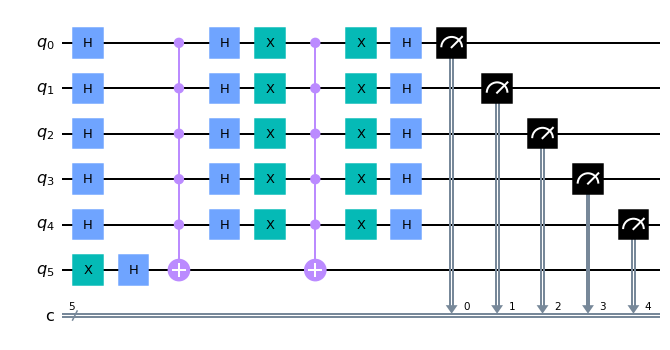

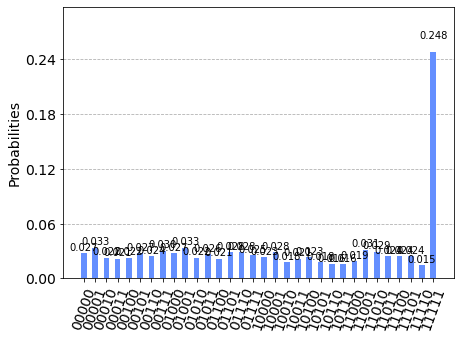

In [47]:
circuit = grover_with_count(1)
display(circuit.draw("mpl"))
run_experiment(circuit)

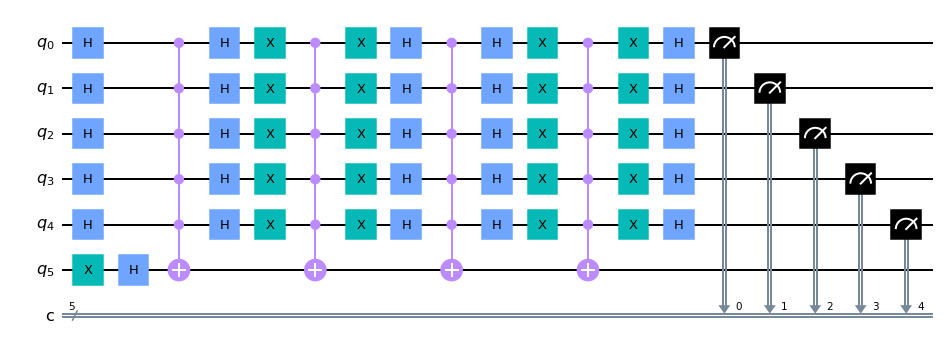

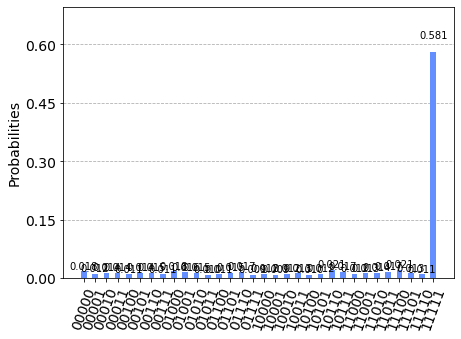

In [48]:
circuit = grover_with_count(2)
display(circuit.draw("mpl"))
run_experiment(circuit)

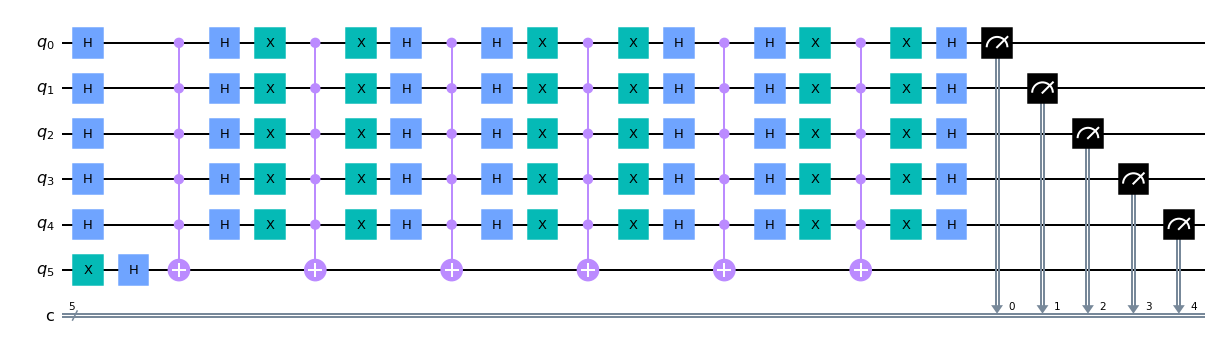

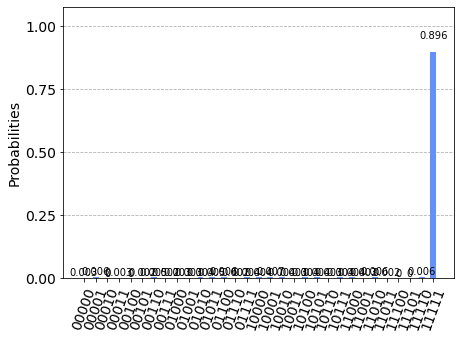

In [49]:
circuit = grover_with_count(3)
display(circuit.draw("mpl"))
run_experiment(circuit)

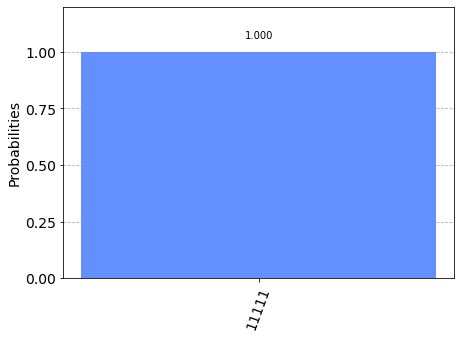

In [50]:
circuit = grover_with_count(4)
circuit.draw("mpl")
run_experiment(circuit)

In [51]:
def apply_oracle_with_s(qc, s, query_qubits):
    if len(s) != n:
        raise "WRONG length of s"
    for i in range(n):
        if s[i] == "0":
            qc.x(i)
        else:
            qc.i(i)
    qc.mcx(query_qubits, n, ancilla_qubits=None, mode='noancilla')
    for i in range(n):
        if s[i] == "0":
            qc.x(i)
        else:
            qc.i(i)


In [52]:
def grover_with_s_count(s, count):
    grover_circuit = QuantumCircuit(n + 1, n)
    grover_circuit.x(n)
    query_qubits = list(range(n))
    for i in range(n + 1):
        grover_circuit.h(i)


    for i in range(count):
        apply_oracle_with_s(grover_circuit, s, query_qubits)
        apply_diffuser(grover_circuit, query_qubits)

    for i in range(n):
        grover_circuit.measure(i, i)
    
    return grover_circuit

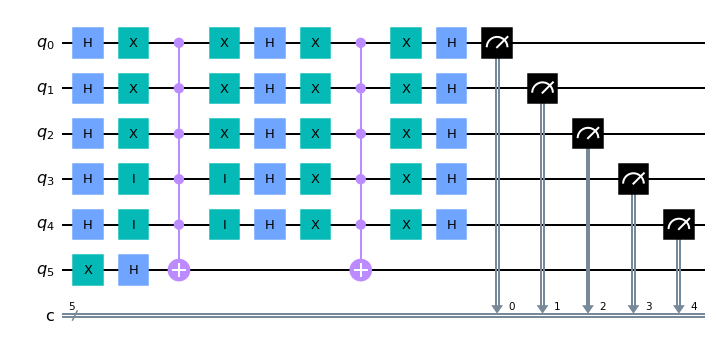

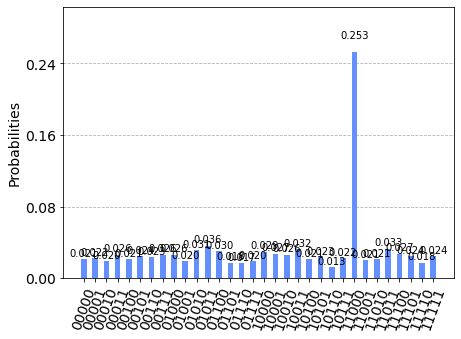

In [53]:
c = grover_with_s_count("00011", 1)
display(c.draw("mpl"))
run_experiment(c)

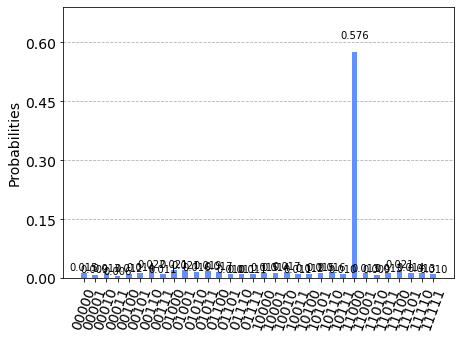

In [54]:
c = grover_with_s_count("00011", 2)
c.draw("mpl")
run_experiment(c)

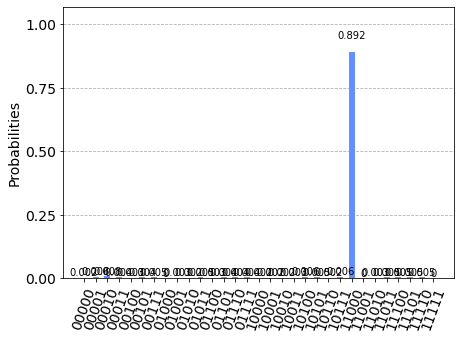

In [55]:
c = grover_with_s_count("00011", 3)
c.draw("mpl")
run_experiment(c)

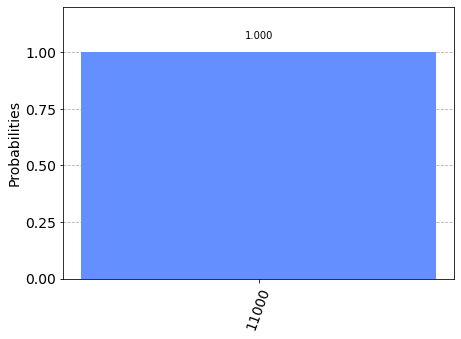

In [56]:
c = grover_with_s_count("00011", 4)
c.draw("mpl")
run_experiment(c)

## Now, let's try multiple solutions

In [57]:
def grover_with_two_s_count(s1, s2, count):
    grover_circuit = QuantumCircuit(n + 1, n)
    grover_circuit.x(n)
    query_qubits = list(range(n))
    for i in range(n + 1):
        grover_circuit.h(i)


    for i in range(count):
        apply_oracle_with_s(grover_circuit, s1, query_qubits)
        apply_oracle_with_s(grover_circuit, s2, query_qubits)
        apply_diffuser(grover_circuit, query_qubits)

    for i in range(n):
        grover_circuit.measure(i, i)
    
    return grover_circuit

0


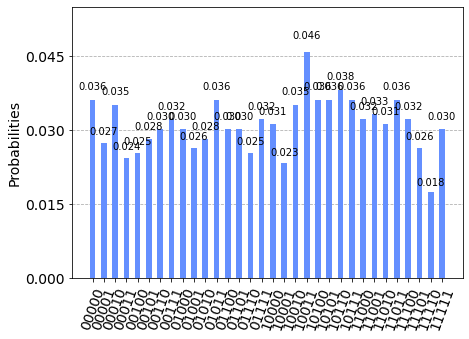

None

1


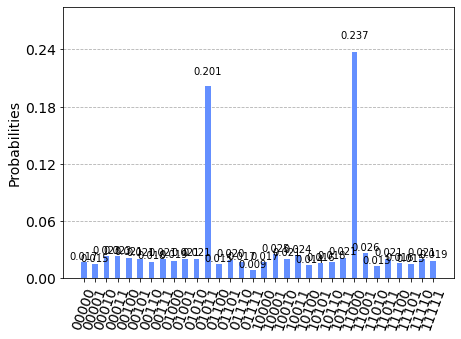

None

2


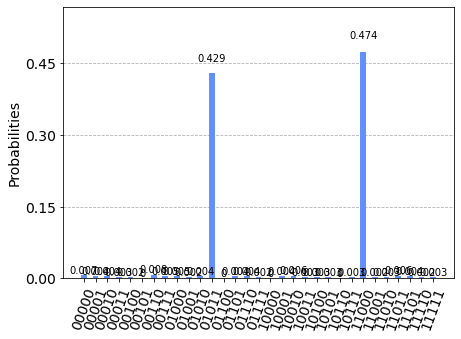

None

3


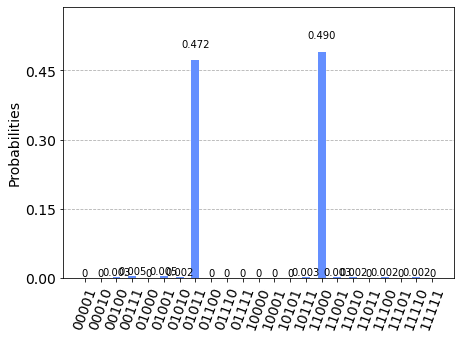

None

4


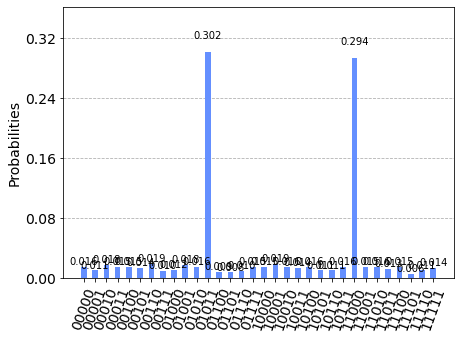

None

5


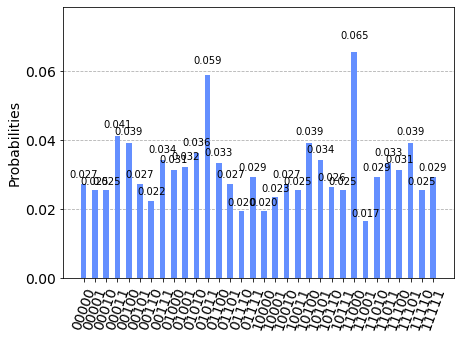

None

6


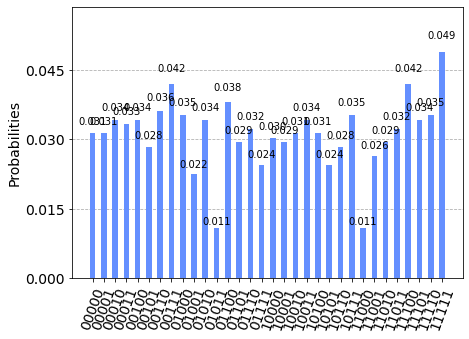

None

7


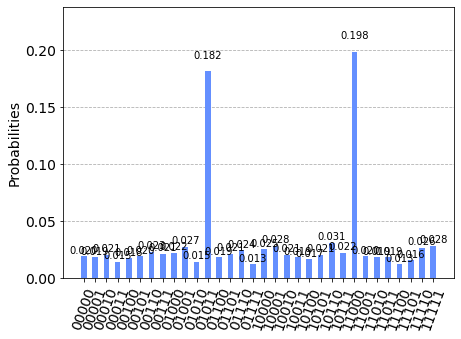

None

8


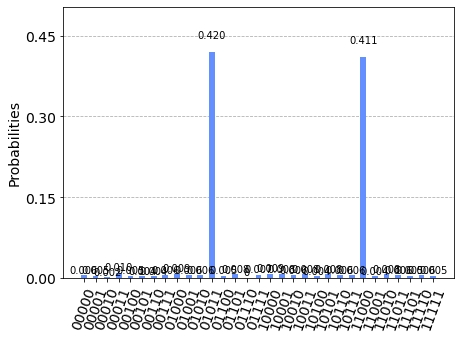

None

9


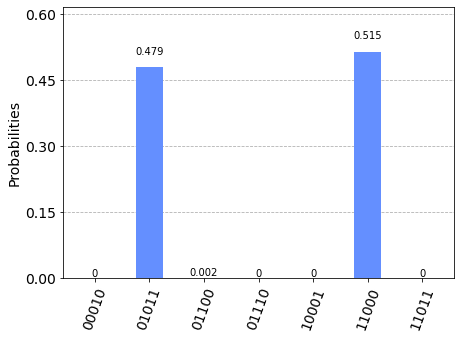

None

In [58]:
for count in range(10):
    c = grover_with_two_s_count("00011", "11010", count)
    print(count)
    display(run_experiment(c))